# Import Libraries

In [1]:
# !pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image

# Load Data

In [2]:
train_datagen=image.ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

In [3]:
train_data=train_datagen.flow_from_directory(
    directory="C:\\Users\\gguru\\Downloads\\Covid19-dataset\\train",
    target_size=(256,256),
    batch_size=16,
    class_mode='binary'
)

Found 181 images belonging to 2 classes.


In [4]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [5]:
test_datagen=image.ImageDataGenerator(
    rescale=1/255
)

In [6]:
test_data=test_datagen.flow_from_directory(
    directory="C:\\Users\\gguru\\Downloads\\Covid19-dataset\\test",
    target_size=(256,256),
    batch_size=16,
    class_mode='binary'
)

Found 46 images belonging to 2 classes.


# CNN Model

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

# Model Training

In [11]:
model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_data=test_data)
#model.fit(train_generator,epochs=2,vaildation_data=vaild_generator)

C:\Users\gguru\AppData\Local\Temp\ipykernel_15796\1763215627.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_data=test_data)


Epoch 1/10
8/8 [==============================] - 23s 3s/step - loss: 1.0116 - accuracy: 0.5556 - val_loss: 0.6857 - val_accuracy: 0.5652
Epoch 2/10
8/8 [==============================] - 21s 3s/step - loss: 0.6456 - accuracy: 0.6406 - val_loss: 0.6425 - val_accuracy: 0.8478
Epoch 3/10
8/8 [==============================] - 21s 2s/step - loss: 0.5636 - accuracy: 0.6667 - val_loss: 0.4924 - val_accuracy: 0.9130
Epoch 4/10
8/8 [==============================] - 24s 3s/step - loss: 0.4805 - accuracy: 0.7578 - val_loss: 0.3389 - val_accuracy: 0.8913
Epoch 5/10
8/8 [==============================] - 22s 3s/step - loss: 0.3236 - accuracy: 0.8974 - val_loss: 0.3615 - val_accuracy: 0.8478
Epoch 6/10
8/8 [==============================] - 24s 3s/step - loss: 0.3031 - accuracy: 0.8750 - val_loss: 0.2752 - val_accuracy: 0.9348
Epoch 7/10
8/8 [==============================] - 24s 3s/step - loss: 0.2784 - accuracy: 0.8828 - val_loss: 0.2063 - val_accuracy: 0.9565
Epoch 8/10
8/8 [==================

(256, 256, 3)

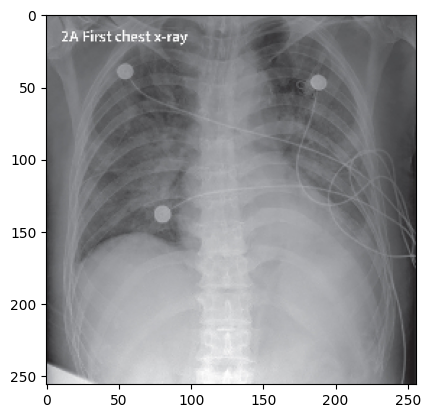

In [22]:
#path of images-one by one
path="C:\\Users\\gguru\\Downloads\\TrainingDataset\\covid\\lancet-case2a.jpg"
img=image.load_img(path,target_size=(256,256,3))

img=image.img_to_array(img)/255
plt.imshow(img)
img=np.array(img)
img.shape


In [23]:
y_pred=model.predict(np.expand_dims(img,axis=0))

1/1 [==============================] - 0s 47ms/step


In [24]:
y_pred

array([[0.04006388]], dtype=float32)

In [25]:
threshold=0.50
np.where(y_pred>threshold,1,0)

array([[0]])

In [26]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}